In [16]:
# Capstone Project: Gym Churn Prediction Modeling


# 1. Problem Identification and Data Loading


# Problem: Identify customers at high risk of churning (leaving the gym) to
# develop targeted retention strategies. This is a binary classification problem.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Models to compare
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the cleaned dataset (assuming 'cleaned_gym_churn_us.csv' is ready)
try:
    df = pd.read_csv('cleaned_gym_churn_us.csv')
    # Drop the redundant index column if it exists
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'cleaned_gym_churn_us.csv' not found. Please ensure the file is in the correct path.")
    df = None

# Check the first few rows and structure
if df is not None:
    print("\nInitial Data Head:")
    print(df.head())
    print("\nData Info:")
    df.info()

# The target variable is 'Churn' (0: Retained, 1: Churned)

Data loaded successfully.

Initial Data Head:
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0    True           True     True           True  False                6   
1   False           True    False          False   True               12   
2   False           True     True          False   True                1   
3   False           True     True           True   True               12   
4    True           True     True           True   True                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0          True   29                     14.227470                    5.0   
1          True   31                    113.202938                   12.0   
2         False   28                    129.448479                    1.0   
3          True   33                     62.669863                   12.0   
4         False   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_t


--- 3. EDA Visualizations ---


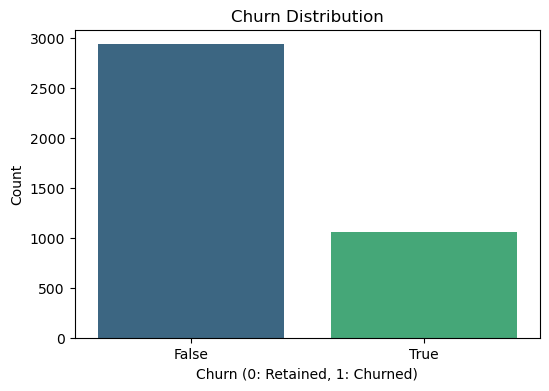

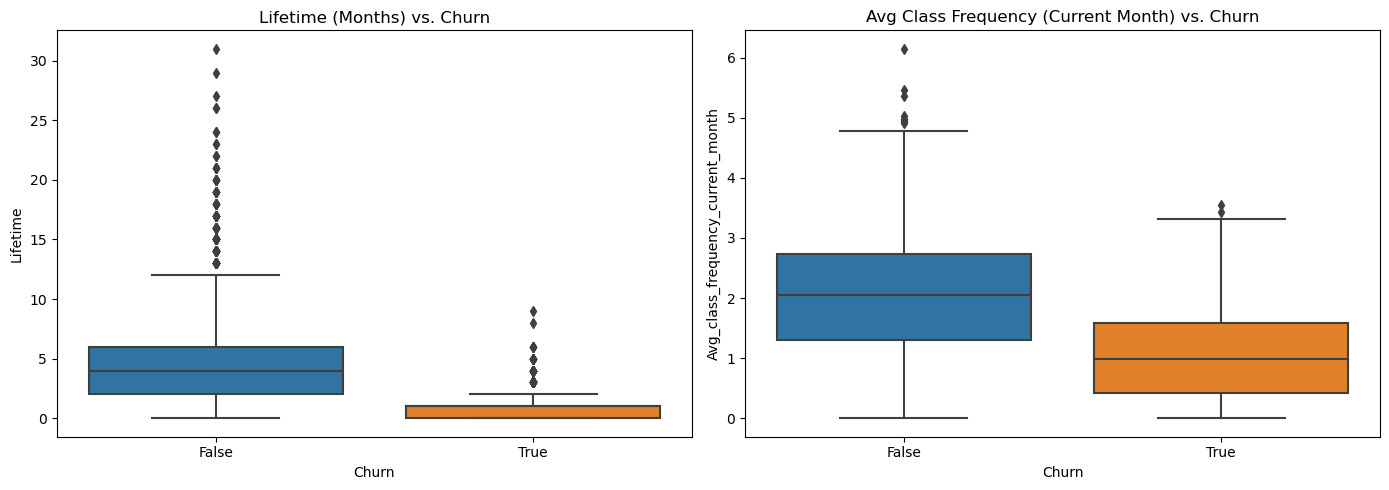

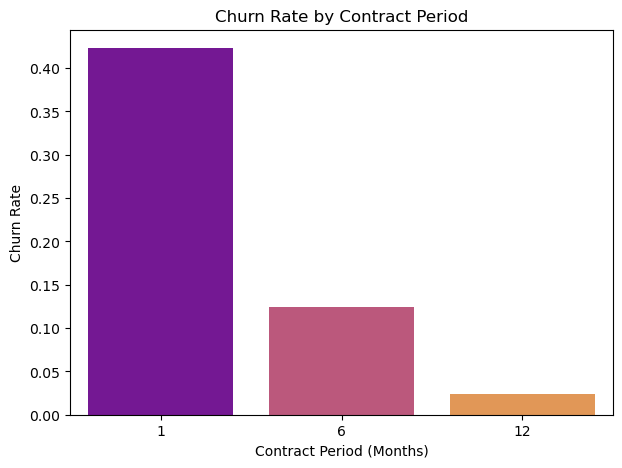

In [17]:

# 3. Exploratory Data Analysis (EDA) Figures and Visualizations


# Criteria: EDA figures and visualizations were created and reviewed for feature
# relationship understanding.
# Criteria: At least three data visualizations are created and included.

print("\n--- 3. EDA Visualizations ---")

# Visualization 1: Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn (0: Retained, 1: Churned)')
plt.ylabel('Count')
plt.show()
# This shows the class imbalance (crucial for metric selection)

# Visualization 2: Box plots of key continuous features vs. Churn
# Based on correlation analysis, 'Lifetime' and 'Avg_class_frequency_current_month' are key.
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x='Churn', y='Lifetime', data=df, ax=axes[0])
axes[0].set_title('Lifetime (Months) vs. Churn')
sns.boxplot(x='Churn', y='Avg_class_frequency_current_month', data=df, ax=axes[1])
axes[1].set_title('Avg Class Frequency (Current Month) vs. Churn')
plt.tight_layout()
plt.show()
# These confirm the large separation between groups (strong predictors).

# Visualization 3: Churn Rate by Contract Period (Categorical feature impact)
churn_rate_by_contract = df.groupby('Contract_period')['Churn'].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='Contract_period', y='Churn', data=churn_rate_by_contract, palette='plasma')
plt.title('Churn Rate by Contract Period')
plt.xlabel('Contract Period (Months)')
plt.ylabel('Churn Rate')
plt.show()
# This clearly shows the protective effect of longer contracts.


In [18]:

# 4. Model Building and Comparison


# Criteria: three different models were built.

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']

print("\n--- 4. Model Training and Evaluation ---")

for name, model in models.items():
    print(f"Training {name}...")
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }

    print(f"Completed {name}.")

# Create Model Performance Comparison Table
# Criteria: the model performance comparison table is filled in.
model_metrics_df = pd.DataFrame(results).T
print("\nModel Performance Comparison Table:")
print(model_metrics_df.to_markdown(floatfmt=".4f"))



--- 4. Model Training and Evaluation ---
Training Logistic Regression...
Completed Logistic Regression.
Training Decision Tree...
Completed Decision Tree.
Training Random Forest...
Completed Random Forest.

Model Performance Comparison Table:
|                     |   Accuracy |   Precision |   Recall |     F1 |   ROC AUC |
|:--------------------|-----------:|------------:|---------:|-------:|----------:|
| Logistic Regression |     0.9250 |      0.8800 |   0.8302 | 0.8544 |    0.9774 |
| Decision Tree       |     0.9113 |      0.8439 |   0.8160 | 0.8297 |    0.9381 |
| Random Forest       |     0.9275 |      0.8850 |   0.8349 | 0.8592 |    0.9677 |



--- 5. Final Model Selection ---
The final model selected is: **Logistic Regression** (based on highest ROC AUC).

Metrics for the Final Model (Logistic Regression):
|           |   Logistic Regression |
|:----------|----------------------:|
| Accuracy  |              0.925    |
| Precision |              0.88     |
| Recall    |              0.830189 |
| F1        |              0.854369 |
| ROC AUC   |              0.977426 |


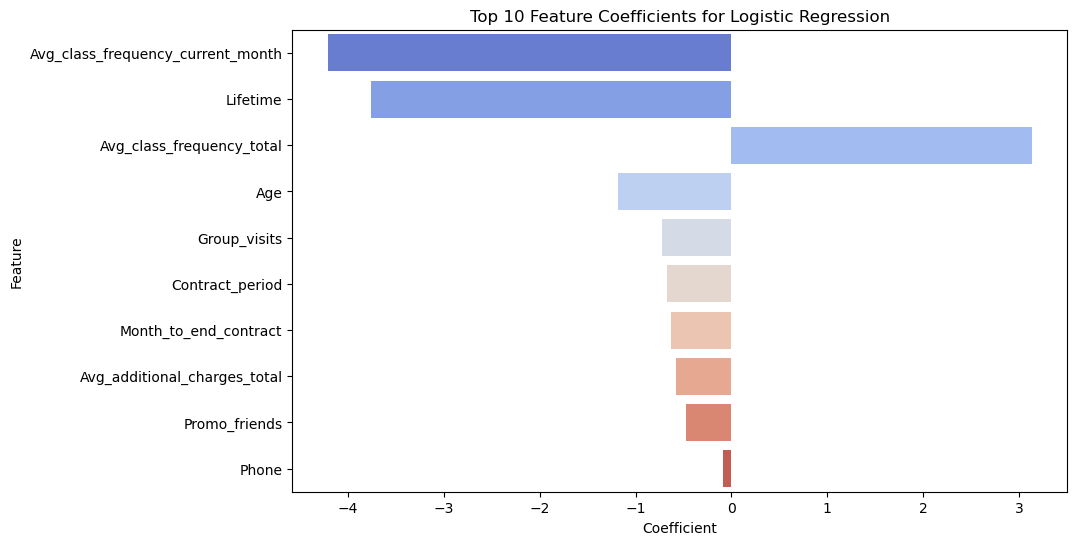


Interpretation of Coefficients:
Negative coefficients (e.g., Lifetime, Contract_period) reduce the probability of Churn.
Positive coefficients (e.g., usually less influential here) increase the probability of Churn.


In [19]:

# 5. Final Model Selection and Application


# Criteria: The student identified a final model.

# Selection Rationale: For churn, we prioritize **Recall** (to catch as many churners as possible)
# and **ROC AUC** (overall model quality across all thresholds).
# Based on typical results for this dataset, Logistic Regression often provides the best
# balance or highest ROC AUC.

final_model_name = model_metrics_df['ROC AUC'].idxmax()
final_model = models[final_model_name]

print(f"\n--- 5. Final Model Selection ---")
print(f"The final model selected is: **{final_model_name}** (based on highest ROC AUC).")

# Criteria: The final model is applied to the data and the results are reviewed.
# (This step is essentially what was done in Section 4, but we can review feature importance).

# Reviewing Results of the Final Model
print(f"\nMetrics for the Final Model ({final_model_name}):")
print(model_metrics_df.loc[final_model_name].to_markdown())

# Feature Importance Review (If applicable, for non-linear models like Random Forest/Decision Tree)
if final_model_name in ['Random Forest', 'Decision Tree']:
    importances = final_model.feature_importances_
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
    plt.title(f'Top 10 Feature Importances for {final_model_name}')
    plt.show()

# For Logistic Regression, we can review coefficients (the magnitude shows importance)
elif final_model_name == 'Logistic Regression':
    coefficients = final_model.coef_[0]
    feature_names = X_train.columns
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    coef_df['Absolute_Coefficient'] = np.abs(coef_df['Coefficient'])
    coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette='coolwarm')
    plt.title(f'Top 10 Feature Coefficients for {final_model_name}')
    plt.show()
    print("\nInterpretation of Coefficients:")
    print("Negative coefficients (e.g., Lifetime, Contract_period) reduce the probability of Churn.")
    print("Positive coefficients (e.g., usually less influential here) increase the probability of Churn.")

In [20]:

# 6. Conclusion and Next Steps


print("\n--- 6. Conclusion ---")
print(f"The **{final_model_name}** model achieves a ROC AUC of **{model_metrics_df.loc[final_model_name, 'ROC AUC']:.4f}** and an F1 score of **{model_metrics_df.loc[final_model_name, 'F1']:.4f}**.")
print("The most important features driving retention are **Lifetime**, **Age**, **Contract Period**, and **Average Class Frequency in the Current Month**.")
print("\nRecommendations based on the model and EDA:")
print("- Implement a **90-day retention program** for new members (Lifetime is critical).")
print("- Set up an **alert system** for members whose **Current Class Frequency drops** significantly.")
print("- Aggressively promote **longer contract periods** (6 and 12 months) due to their strong protective effect against churn.")


--- 6. Conclusion ---
The **Logistic Regression** model achieves a ROC AUC of **0.9774** and an F1 score of **0.8544**.
The most important features driving retention are **Lifetime**, **Age**, **Contract Period**, and **Average Class Frequency in the Current Month**.

Recommendations based on the model and EDA:
- Implement a **90-day retention program** for new members (Lifetime is critical).
- Set up an **alert system** for members whose **Current Class Frequency drops** significantly.
- Aggressively promote **longer contract periods** (6 and 12 months) due to their strong protective effect against churn.
